# Instructions

## Dataset and Goal

The Sarcasm on Reddit dataset provides comments posted on Reddit labeled as sarcastic (1) or not sarcastic (0). The task of the project is, given only the parent comment and the Reddit category (subreddit), to predict the probability of a parent comment to receive a sarcastic comment.

  

## Evaluation strategy

Cross-validation.

## Dataset

[Sarcasm on Reddit](https://www.kaggle.com/danofer/sarcasm)

## References

[Khodak, M., Saunshi, N., & Vodrahalli, K. (2017). A large self-annotated corpus for sarcasm](https://arxiv.org/abs/1704.05579)

[Eke, C. I., Norman, A. A., Shuib, L., & Nweke, H. F. (2019). Sarcasm identification in textual data: systematic review, research challenges and open directions. Artificial Intelligence Review, 1-44](https://link.springer.com/article/10.1007/s10462-019-09791-8)

[Joshi, A., Bhattacharyya, P., & Carman, M. J. (2017). Automatic sarcasm detection: A survey. ACM Computing Surveys (CSUR), 50(5), 1-22](https://dl.acm.org/doi/abs/10.1145/3124420)

# Project

## Import Dataset

In [90]:
import time
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [91]:
for dirname, _, filenames in os.walk('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-balanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-unbalanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarc.csv.gz
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarcasm.csv


In [93]:
nRowsRead = None # specify 'None' if want to read whole file
# train-balanced-sarcasm.csv has 1010826 rows in reality, but we are only loading/previewing the first 1000 rows
df_data = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/train-balanced-sarcasm.csv', delimiter=',', nrows = nRowsRead)
df_data.dataframeName = 'train-balanced-sarcasm.csv'
nRow, nCol = df_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1010826 rows and 10 columns


In [94]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [95]:
nRowsRead = None # specify 'None' if want to read whole file, else an int to retrieve a subset of rows
# test-unbalanced.csv has 63997 rows in reality, but we are only loading/previewing the first 1000 rows
df_test_unbal = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/test-unbalanced.csv', delimiter=',', nrows = nRowsRead)
df_test_unbal.dataframeName = 'test-unbalanced.csv'
nRow, nCol = df_test_unbal.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 63997 rows and 3 columns


In [96]:
df_test_unbal.head()

,7u1ht,c07em3g,1
0,7u92p,c07f8sq c07flil c07fgh5 c07f9ck c07fn0s c07fl0...,0 0 0 0 0 0 0 0 0 0 0
1,7vvpw,c07khcb c07jx0k c07jzxi c07k0t3 c07jx2j,0 0 0 0 0
2,7vv27 c07ju7y,c07jub3,1
3,7wco4,c07l718 c07lfcd c07l7zu,0 0 0
4,7xgdr,c07o9qu,1


In [42]:
df_test_unbal.describe()

,7u1ht,c07em3g,1
count,63997,63997,63997
unique,63997,63997,5580
top,ql4d6,d4d8662 d4dbs6x d4d5opl d4dqdzc,1
freq,1,1,10988


In [97]:
df_test_unbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63997 entries, 0 to 63996
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   7u1ht    63997 non-null  object
 1   c07em3g  63997 non-null  object
 2   1        63997 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [98]:
nRowsRead = None # specify 'None' if want to read whole file, else an int to retrieve a subset of rows
# test-unbalanced.csv has 63997 rows in reality, but we are only loading/previewing the first 1000 rows
df_test_bal = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/test-balanced.csv', delimiter=',', nrows = nRowsRead)
df_test_bal.dataframeName = 'test-unbalanced.csv'
nRow, nCol = df_test_bal.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 32332 rows and 3 columns


In [100]:
df_test_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32332 entries, 0 to 32331
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   7x7dx            32332 non-null  object
 1   c07nkao c07nk63  32332 non-null  object
 2   1 0              32332 non-null  object
dtypes: object(3)
memory usage: 757.9+ KB


In [101]:
df_test_unbal.head(5)

,7u1ht,c07em3g,1
0,7u92p,c07f8sq c07flil c07fgh5 c07f9ck c07fn0s c07fl0...,0 0 0 0 0 0 0 0 0 0 0
1,7vvpw,c07khcb c07jx0k c07jzxi c07k0t3 c07jx2j,0 0 0 0 0
2,7vv27 c07ju7y,c07jub3,1
3,7wco4,c07l718 c07lfcd c07l7zu,0 0 0
4,7xgdr,c07o9qu,1


In [102]:
df_test_bal.head(5)

,7x7dx,c07nkao c07nk63,1 0
0,7xtxk,c07pji4 c07ppds,1 0
1,7zh5l,c07twag c07twp2,1 0
2,80nmo,c07y1rj c07xhyn,0 1
3,8139p,c07yhlm c07yoiw,1 0
4,bnmod,c0nnujf c0nofrs,1 0


## Data Cleaning

Drop na tuples

In [103]:
df_data.isna().sum(axis=0)

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [104]:
na_comments = df_data["comment"].isna()
na_comments = df_data[na_comments].index
df_data.drop(na_comments, axis=0, inplace=True)

Check validity of ups and downs attributes

In [105]:
df_data.describe()

,label,score,ups,downs
count,1.010773e+06,1.010773e+06,1.010773e+06,1.010773e+06
mean,4.999817e-01,6.885999e+00,5.499140e+00,-1.458686e-01
std,5.000002e-01,4.834411e+01,4.127402e+01,3.529746e-01
min,0.000000e+00,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00
max,1.000000e+00,9.070000e+03,5.163000e+03,0.000000e+00


In [106]:
value_counts_downs = df_data["downs"].value_counts()
value_counts_downs

 0    863333
-1    147440
Name: downs, dtype: int64

In [107]:
value_count_ups = df_data["ups"].value_counts()
value_count_ups

 1       289577
-1       168042
 2       138984
 3        76593
 0        51848
          ...  
 2813         1
 764          1
-261          1
 762          1
 760          1
Name: ups, Length: 1171, dtype: int64

In [108]:
negative_ups = sum(df_data["ups"] < 0)
negative_ups

209162

## Data Exploration

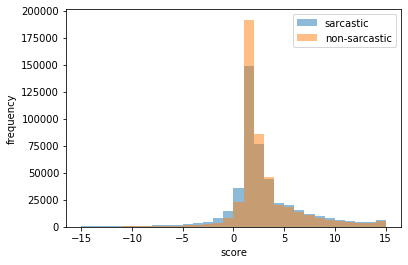

In [109]:
import matplotlib.pyplot as plt

scores_sarc = df_data["score"][df_data["label"] == 1]
scores_non = df_data["score"][df_data["label"] == 0]
bins = list(range(-15, 16))
plt.hist(scores_sarc, bins=bins, alpha=0.5, label="sarcastic")
plt.hist(scores_non, bins=bins, alpha=0.5, label="non-sarcastic")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc="upper right")
plt.savefig('sarcasm_distribution_by_score.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()
plt.show()

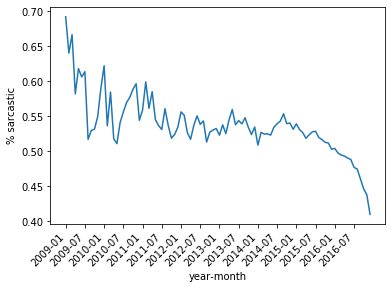

In [111]:
by_month = df_data.groupby("date").agg({"label" : "mean", "comment" : "count"})
months = list(by_month.index)
label_pos = list(range(0, len(months), 6))
m_labels = [months[i] for i in label_pos]

plt.plot(months, by_month["label"])
plt.xlabel("year-month")
plt.ylabel("% sarcastic")
plt.xticks(label_pos, m_labels, rotation=45, ha="right")
plt.savefig('sarcasm_distribution_by_year_month.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()
plt.show()

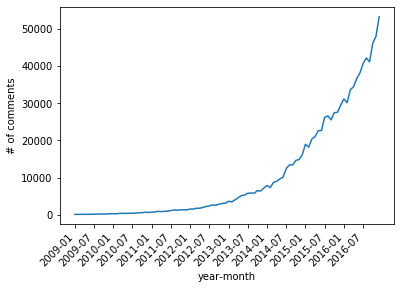

In [112]:
months = list(by_month.index)
label_pos = list(range(0, len(months), 6))
m_labels = [months[i] for i in label_pos]

plt.plot(months, by_month["comment"])
plt.xlabel("year-month")
plt.ylabel("# of comments")
plt.xticks(label_pos, m_labels, rotation=45, ha="right")
plt.savefig('commentnumber_distribution_by_year_month.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()
plt.show()

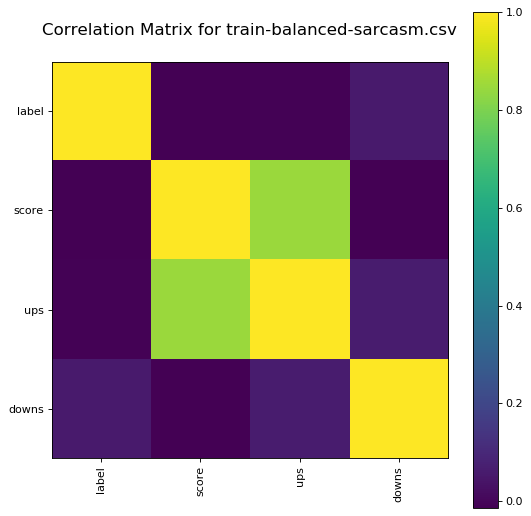

In [113]:
import matplotlib.pyplot as plt # plotting

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(df_data, 8)

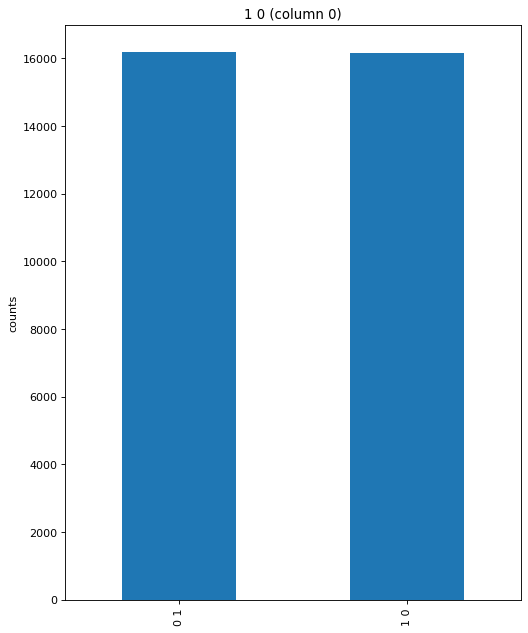

In [58]:
import numpy as np

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df_test_bal, 10, 5)

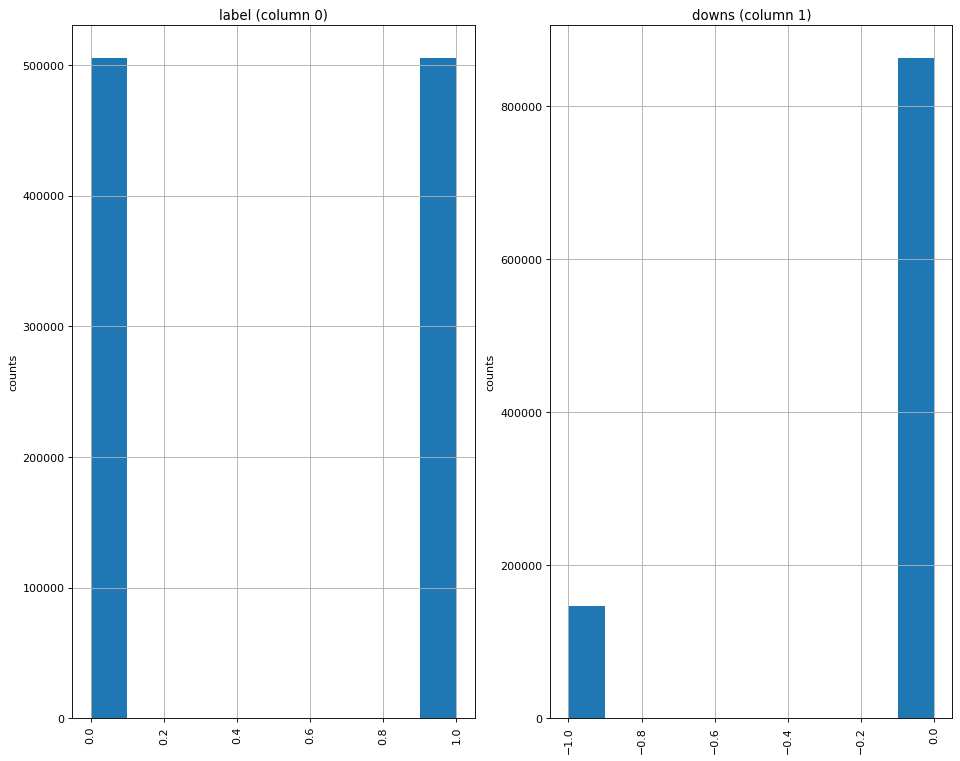

In [114]:
plotPerColumnDistribution(df_data, 10, 5)

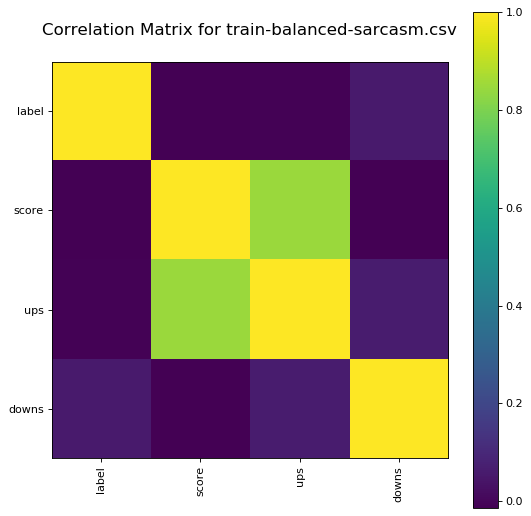

In [115]:
plotCorrelationMatrix(df_data, 8)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

startTime = time.time()

plotScatterMatrix(df_data, 12, 10) # warning: slow

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

## Train/Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(df_data, test_size=0.25, random_state=42)
validation_data.shape

## Model

### Logistic Regression

make a classifier using Logistic Regresssion only for comment attribute with a Bag of Words

In [119]:
train_comments = train_data["comment"]
train_comments.head()

61809     Not drafting Reed, Olsen, or Gronk at where th...
509675                        Don't you just love the FPTP.
132418    The question is why Chief Delphi, TBA, and the...
183253    easier gold farm is warrior Bolster, Target Du...
190605                                         What a cuck!
Name: comment, dtype: object

In [120]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vect = CountVectorizer(max_features=20000)
train_bow = vect.fit_transform(train_comments)
train_bow.shape

(758079, 20000)

In [121]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier

log_reg_model = LogisticRegression(random_state=42)
cross_validate(log_reg_model, train_bow, train_data["label"], cv=3, scoring="accuracy", n_jobs=-1)

{'fit_time': array([16.2723825 , 16.42628551, 16.25543022]),
 'score_time': array([0.09897375, 0.06588769, 0.09797835]),
 'test_score': array([0.69039111, 0.68786235, 0.69000328])}

In [122]:
from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")

vect = CountVectorizer(strip_accents='unicode', stop_words=stop_words_en, min_df=0.0001, max_df=0.70)
train_bow = vect.fit_transform(train_comments)
train_bow.shape

(758079, 6352)

In [123]:
tf_trans = TfidfTransformer()
train_tf = tf_trans.fit_transform(train_bow)
train_tf.shape

(758079, 6352)

In [125]:
from sklearn.pipeline import Pipeline

# recreate the vectorizer and transformer so they are not fit yet
vect = CountVectorizer(strip_accents='unicode', stop_words=stop_words_en, min_df=0.0001, max_df=0.70)
tf_trans = TfidfTransformer()

# create the model
log_reg_model = LogisticRegression(random_state=42, penalty="elasticnet", solver="saga")

pipeline = Pipeline([
    ('vect', vect),
    ('tftrans', tf_trans),
    ('model', log_reg_model)
])

In [126]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
61809,0,"Not drafting Reed, Olsen, or Gronk at where th...",tykulton,fantasyfootball,2,-1,-1,2016-12,2016-12-21 23:35:45,"What is your ""one rule"" for the draft next sea..."
509675,1,Don't you just love the FPTP.,Gardengran,canada,1,1,0,2016-01,2016-01-10 01:51:50,And in Canada 27% voted for the Liberals so th...
132418,1,"The question is why Chief Delphi, TBA, and the...",BellLabs,FRC,11,-1,-1,2016-11,2016-11-23 16:13:51,Why am I not surprised anymore.
183253,0,"easier gold farm is warrior Bolster, Target Du...",Nickster357a,hearthstone,1,1,0,2016-09,2016-09-15 00:41:22,lol been playing this for an hour just farming...
190605,1,What a cuck!,somenbjorn,ShitWehraboosSay,2,2,0,2016-07,2016-07-27 15:28:02,"At least Sparks, if that's even his real name,..."


In [ ]:
start_time = time.time()

param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000),
    'model__l1_ratio': (0.0, 0.25, 0.50, 0.75, 1.0)
}

grid_logreg = GridSearchCV(pipeline, param_grid, scoring = "accuracy", cv = 3, n_jobs =- 1)
grid_logreg.fit(train_comments, train_data["label"])

print("--- %s seconds ---" % (time.time() - start_time))

In [130]:
print(grid_logreg.best_score_)
for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, grid_logreg.best_params_[param_name]))

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB

vect = CountVectorizer(strip_accents='unicode', stop_words=stopwords, min_df=0.0001, max_df=0.70)
tf_trans = TfidfTransformer()

# create the NB model
nb_model = MultinomialNB()

pipeline = Pipeline([
    ('vect', vect),
    ('tftrans', tf_trans),
    ('model', nb_model)
])

In [87]:
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000)
}

grid_nb = GridSearchCV(pipeline, param_grid, scoring="accuracy", cv=3, n_jobs=-1)
grid_nb.fit(train_comments, train_data["label"])

TypeError: 'WordListCorpusReader' object is not iterable

In [88]:
print(grid_nb.best_score_)
for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, grid_nb.best_params_[param_name]))

nan
vect__max_features: 5000
vect__ngram_range: (1, 1)
